In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('train.csv', index_col=0)

In [3]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [4]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y) 


# Train-test split

In [5]:
# Baseline model

dummy_cols = ['Pclass', 'Age']

X_dummy_train = X_train[dummy_cols]
X_dummy_test = X_test[dummy_cols]

In [6]:
X_dummy_test

,Pclass,Age
PassengerId,,
469,3,NaN
246,1,44.0
771,3,24.0
294,3,24.0
142,3,22.0
...,...,...
298,1,2.0
200,2,24.0
544,2,32.0


In [7]:

baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_dummy_train, y_train)
ypred_baseline = baseline.predict(X_dummy_train)

In [8]:
baseline.score(X_dummy_train, y_train)

0.624251497005988

In [9]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

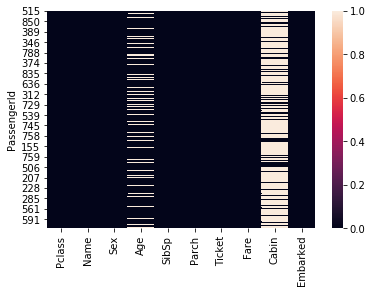

In [10]:
sns.heatmap(X_train.isna()) 

In [11]:
# Fix missing values

In [12]:
X_train.drop('Cabin', axis=1, inplace=True)

C:\Users\maras\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
median = X_train['Age'].median()
median

28.0

In [14]:
X_train["Age"].fillna(median, inplace= True)
X_train.groupby('Pclass').transform('median')['Age']



C:\Users\maras\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


PassengerId
515    28.0
333    33.5
866    28.5
832    28.5
444    28.5
       ... 
73     28.5
309    28.5
621    28.0
71     28.5
761    28.0
Name: Age, Length: 668, dtype: float64

In [15]:
X_train['Age'].fillna(X_train.groupby('Pclass').transform('median')['Age'], inplace=True)

In [16]:



X_train = X_train.drop(['Name', 'Ticket',], axis = 1)
X_test = X_test.drop(['Name'], axis=1)



In [17]:
X_train['Embarked'] = X_train['Embarked'].fillna('m')
X_train.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

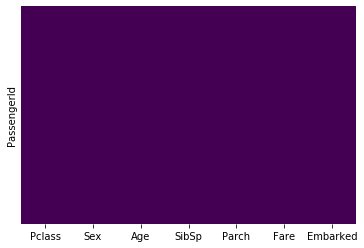

In [18]:
sns.heatmap(X_train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [19]:
X_train['Fare'].min(), X_train['Fare'].max()

(0.0, 512.3292)

In [20]:
scaler = MinMaxScaler()
scaler.fit(X_train[['Fare']])

X_train['Fare'] = scaler.transform(X_train[['Fare']])

In [21]:

X_train['Fare'].min(), X_train['Fare'].max()

(0.0, 1.0)

In [22]:
X_train = pd.get_dummies(X_train, drop_first = True)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_m
PassengerId,,,,,,,,,
515,3,24.00,0,0,0.014631,1,0,1,0
333,1,38.00,0,1,0.299539,1,0,1,0
866,2,42.00,0,0,0.025374,0,0,1,0
832,2,0.83,1,1,0.036598,1,0,1,0
444,2,28.00,0,0,0.025374,0,0,1,0


In [23]:
scaler = MinMaxScaler()
scaler.fit(X_train[['Fare']])

X_train['Fare'] = scaler.transform(X_train[['Fare']])

In [24]:

X_train['Fare'].min(), X_train['Fare'].max()

(0.0, 1.0)

In [25]:
X_train = pd.get_dummies(X_train, drop_first = True)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_m
PassengerId,,,,,,,,,
515,3,24.00,0,0,0.014631,1,0,1,0
333,1,38.00,0,1,0.299539,1,0,1,0
866,2,42.00,0,0,0.025374,0,0,1,0
832,2,0.83,1,1,0.036598,1,0,1,0
444,2,28.00,0,0,0.025374,0,0,1,0


In [26]:
m_dummy = DummyClassifier(strategy='most_frequent', random_state=10)

In [27]:

m_dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=10, strategy='most_frequent')

In [28]:
m = LogisticRegression()

In [29]:
m.fit(X_train, y_train)
ypred = m.predict(X_train)


C:\Users\maras\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
accuracy_score(ypred, y_train)

0.8038922155688623

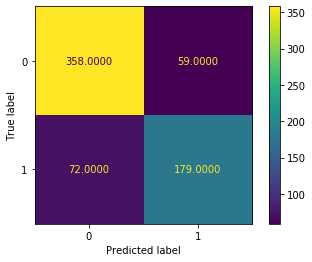

In [31]:
plot_confusion_matrix(m, X_train, y_train, values_format='.4f')

In [32]:

accuracy = cross_val_score(m, X_train, ypred, cv=5, scoring='accuracy')
print("Cross-validation scores: ", accuracy)

C:\Users\maras\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Cross-validation scores:  [0.99253731 0.98507463 1.         0.9924812  0.9924812 ]


C:\Users\maras\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\maras\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [33]:
## Random forest
rfc = RandomForestClassifier(n_estimators=20)
 


In [34]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred= rfc.predict(X_test)